## Logistic regression implementation using tensorflow

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model parameters
learning_rate = 0.05
n_epochs = 1000
display_step = 100

# random number generator
rng = np.random

In [3]:
# Training Data
X_train = np.asarray([rng.uniform(0,1) for x in np.arange(20)])
y_train = X_train * 10 + 20 + np.asarray([rng.uniform(0,1) for x in np.arange(20)])
n = X_train.shape[0]
print(y_train)

[ 21.40864484  27.53274611  21.06956378  23.68638809  26.63836198
  26.14634149  26.12919043  21.50049809  29.90124237  29.23422764
  28.84608545  28.99446834  23.64653012  21.50186648  22.52682553
  24.80870572  29.28681996  25.7083932   23.56490011  28.14134019]


In [4]:
# Tensorflow graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
y_pred = tf.add(tf.mul(X, W), b)

In [6]:
# Root Mean squared error
cost = tf.sqrt(tf.reduce_sum(tf.pow(y_pred-Y, 2))/(2*n))

# Optimize cost function by using gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.initialize_all_variables()

In [8]:
# Launch the graph
sess = tf.Session()
tf.device("/cpu:0")
sess.run(init)

# Fit all training data
for epoch in range(n_epochs):
    for (x, y) in zip(X_train, y_train):
        sess.run(optimizer, feed_dict={X: x,Y:y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: X_train,Y: y_train})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: X_train,Y: y_train})
print("Cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0100 cost= 4.957966805 W= 7.26089 b= 14.9664
Epoch: 0200 cost= 0.203342691 W= 9.91907 b= 20.6428
Epoch: 0300 cost= 0.203356788 W= 9.91933 b= 20.6428
Epoch: 0400 cost= 0.203370735 W= 9.91959 b= 20.6428
Epoch: 0500 cost= 0.203384981 W= 9.91986 b= 20.6428
Epoch: 0600 cost= 0.203399017 W= 9.92012 b= 20.6428
Epoch: 0700 cost= 0.203412980 W= 9.92038 b= 20.6428
Epoch: 0800 cost= 0.203427330 W= 9.92065 b= 20.6428
Epoch: 0900 cost= 0.203441679 W= 9.92091 b= 20.6428
Epoch: 1000 cost= 0.203455836 W= 9.92117 b= 20.6428
Optimization Finished!
Cost= 0.203456 W= 9.92117 b= 20.6428 



As we can see, I have generated data with weight = 10 and bias = 20. I got the same parameters with linear regression. I did not get the exact parameters because I added random noise in the data

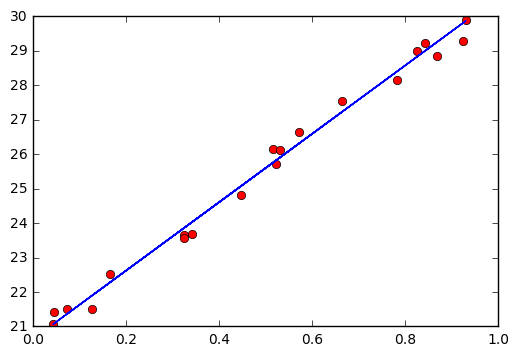

In [9]:
# Regression model
plt.plot(X_train, y_train, 'ro', label='Train data')
plt.plot(X_train, sess.run(W) * X_train + sess.run(b))
plt.show()

## Test the model

In [10]:
# Testing examples
X_test = np.asarray([rng.uniform(0,1) for x in np.arange(20)])
y_test = X_test * 10 + 20 + np.asarray([rng.uniform(0,1) for x in np.arange(20)])

In [14]:
test_error = sess.run( tf.sqrt(tf.reduce_sum(tf.pow(y_pred - Y, 2)) / (2 * X_test.shape[0])),feed_dict={X: X_test, Y: y_test})  # same function as cost above
print("Root mean squared error: ", test_error)

Root mean squared error:  0.210009


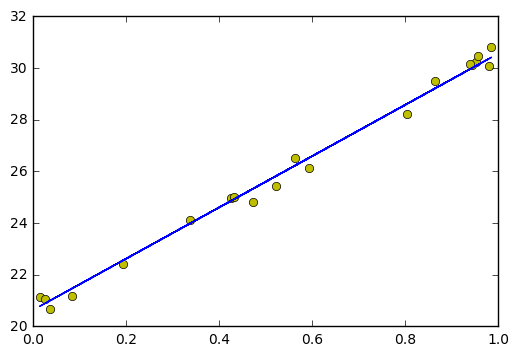

In [15]:
plt.plot(X_test, y_test, 'yo', label='Test data')
plt.plot(X_test, sess.run(W) * X_test + sess.run(b))
plt.show()